In [1]:
# Must be installed the first time you run this code
!pip install hdbscan
!pip install kneed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.9 MB/s eta 0:00:00


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances

from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import hdbscan

In [3]:
import pandas as pd
import statsmodels.api as sm
from google.colab import drive
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load an CSV file
file_path = '/content/drive/My Drive/DataMiningProject/data/movies.csv'
data = pd.read_csv(file_path)

data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2620845,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2213594,"Matthew McConaughey, Anne Hathaway, Michael Ca..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2953309,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1410851,"Sam Worthington, Zoe Saldaña, Sigourney Weaver..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1485386,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


In [6]:
file_path = '/content/drive/My Drive/DataMiningProject/data/movies-trimmed.csv'
data_trimmed = pd.read_csv(file_path)

data_trimmed.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2620845,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2213594,"Matthew McConaughey, Anne Hathaway, Michael Ca..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2953309,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1410851,"Sam Worthington, Zoe Saldaña, Sigourney Weaver..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1485386,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


# Vectorize keyword

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values in the `keywords` column
data['keywords'] = data['keywords'].fillna('')

# Vectorize the `keywords` column using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features for dimensionality
keywords_matrix = vectorizer.fit_transform(data['keywords'])

# Convert to DataFrame for easier manipulation
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [8]:
# Add the `popularity` column to the keyword vectors
keywords_df['popularity'] = data['popularity']

In [9]:
# Calculate correlations between each keyword and popularity
correlations = keywords_df.corr()['popularity'].sort_values(ascending=False)
print(correlations.head(10))  # Top 10 most correlated keywords


popularity      1.000000
based           0.097634
on              0.094671
sequel          0.080909
novel           0.059747
or              0.051749
book            0.051162
relationship    0.049008
of              0.044488
city            0.040801
Name: popularity, dtype: float64


# ANALYZING DIRECTORS VS RATINGS

> Add blockquote



In [ ]:
# SKipping approach B

Correlation of Profit with Other Variables:
profit         1.000000
popularity     0.230611
sequel         0.105001
based          0.090972
on             0.087737
                 ...   
film          -0.008223
movie         -0.010252
tv            -0.010252
drama         -0.012650
documentary   -0.017935
Name: profit, Length: 124, dtype: float64


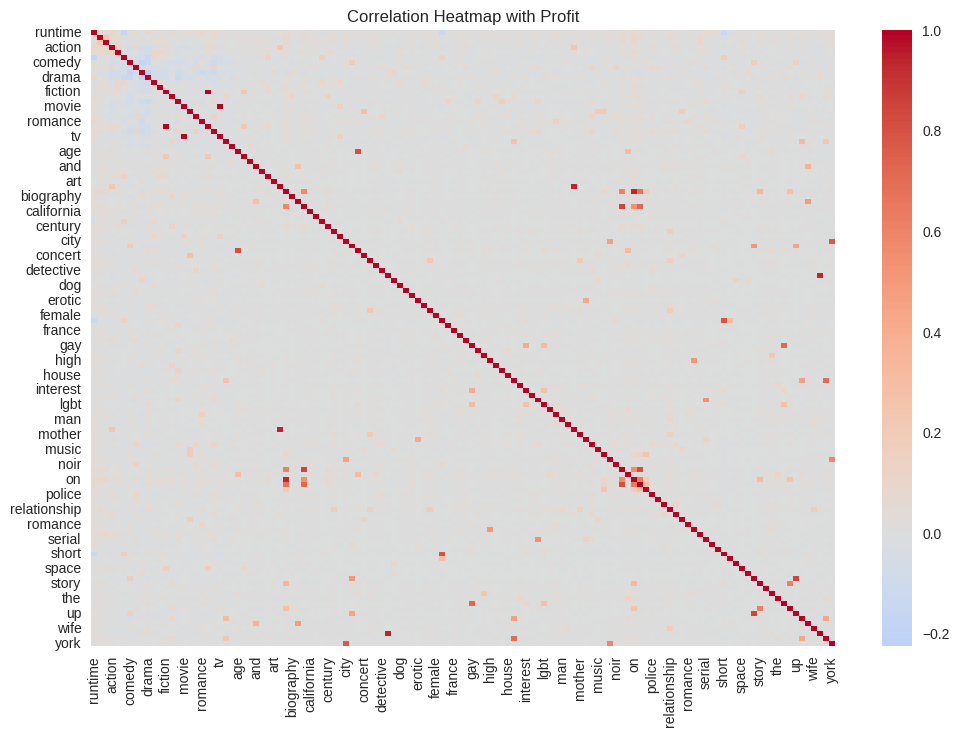

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/DataMiningProject/data/movies.csv'
data = pd.read_csv(file_path)

# Step 1: Calculate Profit
if 'revenue' in data.columns and 'budget' in data.columns:
    data['profit'] = data['revenue'] - data['budget']
else:
    raise ValueError("The dataset must contain 'revenue' and 'budget' columns.")

# Step 2: Vectorize Text Columns (genres, keywords)
vectorizer = TfidfVectorizer(max_features=100)  # Limit features for simplicity

# Vectorize `genres`
data['genres'] = data['genres'].fillna('')  # Handle missing values
genres_matrix = vectorizer.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Vectorize `keywords`
data['keywords'] = data['keywords'].fillna('')
keywords_matrix = vectorizer.fit_transform(data['keywords'])
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())


# Step 3: Combine Numeric and Vectorized Data
# Include numeric columns: runtime, popularity, profit
numeric_columns = ['runtime', 'popularity', 'profit']

# Combine everything into a single DataFrame for correlation
correlation_data = pd.concat([data[numeric_columns].reset_index(drop=True),
                              genres_df, keywords_df], axis=1)

# Step 4: Calculate Correlation with Profit
correlation_matrix = correlation_data.corr()
profit_correlation = correlation_matrix['profit'].sort_values(ascending=False)

# Step 5: Display Results
print("Correlation of Profit with Other Variables:")
print(profit_correlation)

# Step 6: Visualize Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap with Profit")
plt.show()


Top 20 Correlations with Profit:
profit        1.000000
popularity    0.230611
sequel        0.105001
based         0.090972
on            0.087737
adventure     0.080202
space         0.056252
novel         0.049212
action        0.045099
science       0.043109
fiction       0.043109
fantasy       0.042324
runtime       0.040734
animal        0.040208
book          0.038586
or            0.037850
york          0.037603
city          0.037291
alien         0.036206
of            0.035524
Name: profit, dtype: float64


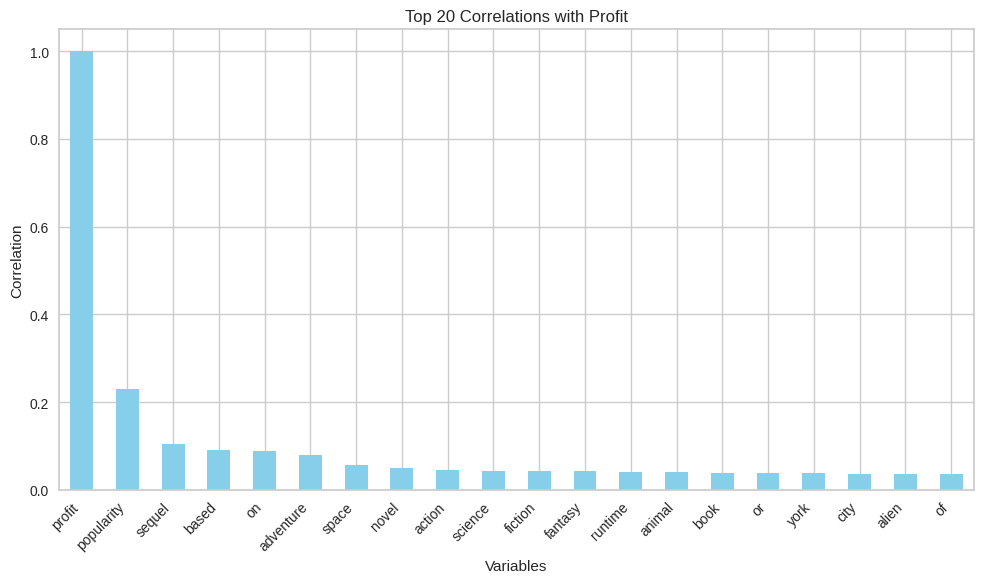

In [11]:
# Display the top 20 correlations with profit
top_20_correlations = profit_correlation.head(20)

print("Top 20 Correlations with Profit:")
print(top_20_correlations)

# Optional: Visualize the top 20 correlations as a bar chart
plt.figure(figsize=(10, 6))
top_20_correlations.plot(kind='bar', color='skyblue')
plt.title('Top 20 Correlations with Profit')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Mean Squared Error: 379298809486562.5
R-Squared: 0.03622756921551418
Top 10 Features Contributing to Profit (Linear Regression):
        Feature   Coefficient
13        movie  5.554088e+16
17      science  2.038731e+16
99       sequel  5.020742e+07
30        based  4.157822e+07
106       space  2.613847e+07
86        novel  2.241068e+07
120       world  1.779083e+07
26       animal  1.725752e+07
34   california  1.499968e+07
35          car  1.472253e+07


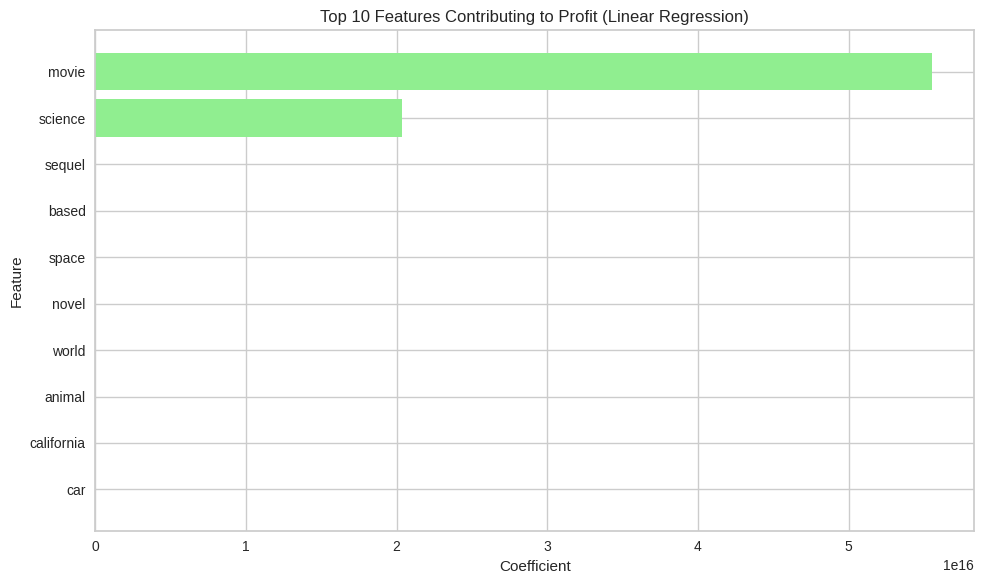

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Combine numeric and vectorized data
numeric_columns = ['runtime', 'profit']
vectorized_columns = list(genres_df.columns) + list(keywords_df.columns)
correlation_data = pd.concat([data[numeric_columns].reset_index(drop=True),
                              genres_df, keywords_df], axis=1)

# Split features (X) and target variable (y)
X = correlation_data.drop(columns=['profit'])
y = correlation_data['profit']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display top features by coefficient
print("Top 10 Features Contributing to Profit (Linear Regression):")
print(coefficients.head(10))

# Plot top 10 features by coefficient
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'][:10], coefficients['Coefficient'][:10], color='lightgreen')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features Contributing to Profit (Linear Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Accuracy: 0.7900872947877834
Cross-Validation Accuracy: 0.7798 (+/- 0.1704)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     83952
           1       0.10      0.78      0.17      2422

    accuracy                           0.79     86374
   macro avg       0.54      0.79      0.53     86374
weighted avg       0.97      0.79      0.86     86374



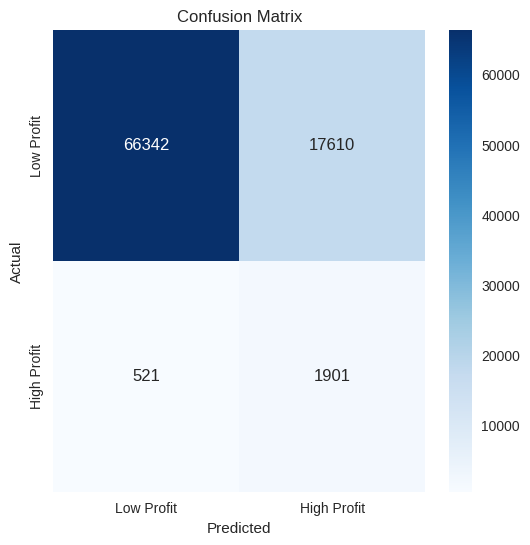

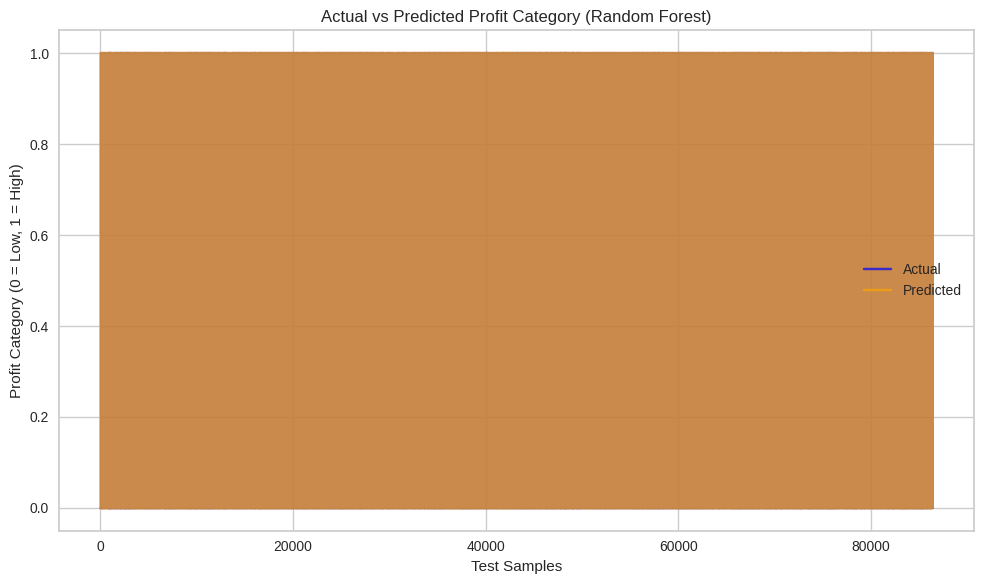

Top 10 Features Contributing to Profit Category (Random Forest):
         Feature  Importance
0        runtime    0.321153
4         comedy    0.058321
1         action    0.048989
88            on    0.040872
30         based    0.039962
94  relationship    0.037620
18      thriller    0.036143
2      adventure    0.030064
7          drama    0.028986
16       romance    0.025966


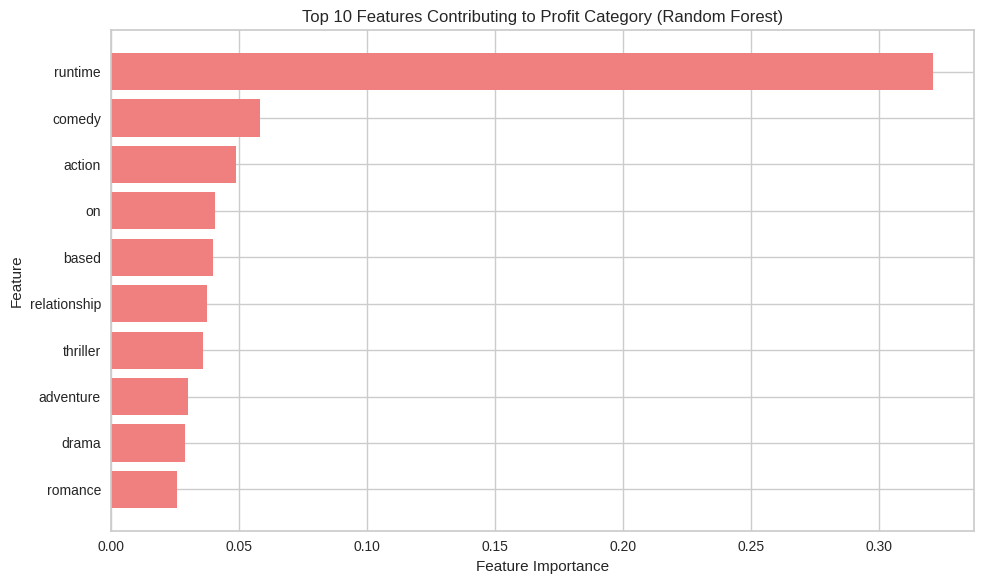


20 Worst Features Contributing to Profit Category (Random Forest):
        Feature  Importance
43      concert    0.000405
23        alien    0.000382
51      england    0.000356
71   kidnapping    0.000348
63         girl    0.000346
113       theme    0.000339
85         noir    0.000338
39    christmas    0.000335
68           ii    0.000330
102      sexual    0.000311
35          car    0.000310
60         gang    0.000304
110     suicide    0.000300
52       erotic    0.000279
111     teenage    0.000261
36      cartoon    0.000249
70     interest    0.000189
96         rock    0.000183
65      history    0.000176
28          art    0.000157


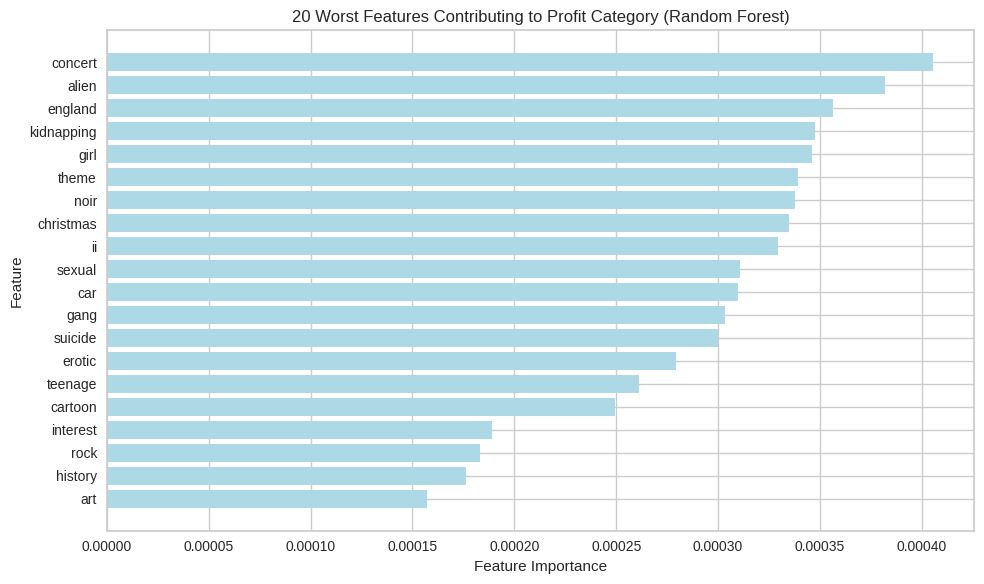

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Combine numeric and vectorized data
numeric_columns = ['runtime', 'profit']
vectorized_columns = list(genres_df.columns) + list(keywords_df.columns)
correlation_data = pd.concat([data[numeric_columns].reset_index(drop=True),
                              genres_df, keywords_df], axis=1)

# Step 1: Categorize Profit into Classes
profit_median = correlation_data['profit'].median()
correlation_data['profit_category'] = (correlation_data['profit'] > profit_median).astype(int)

# Split features (X) and target variable (y)
X = correlation_data.drop(columns=['profit', 'profit_category'])
y = correlation_data['profit_category']

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest Classifier with Hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,            # Number of trees in the forest
    max_depth=15,                # Maximum depth of each tree
    min_samples_split=10,        # Minimum samples required to split an internal node
    min_samples_leaf=5,          # Minimum samples required at a leaf node
    max_features='sqrt',         # Number of features to consider at each split (sqrt for classification)
    random_state=42,             # Ensures reproducibility
    bootstrap=True,               # Use bootstrapped samples for training
    class_weight='balanced'  # Balances class weights
)
rf_classifier.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Step 5: Evaluate the Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Cross-Validation Accuracy
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Profit', 'High Profit'],
            yticklabels=['Low Profit', 'High Profit'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Visualize Accuracy
# Plot the accuracy over training and test data
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='orange', alpha=0.7)
plt.xlabel('Test Samples')
plt.ylabel('Profit Category (0 = Low, 1 = High)')
plt.title('Actual vs Predicted Profit Category (Random Forest)')
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Features Contributing to Profit Category (Random Forest):")
print(feature_importances.head(10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='lightcoral')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Contributing to Profit Category (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Step 8: Display the 20 Worst Features (Lowest Importance)
print("\n20 Worst Features Contributing to Profit Category (Random Forest):")
worst_features = feature_importances.tail(20)  # Bottom 20 features
print(worst_features)

# Plot 20 worst features
plt.figure(figsize=(10, 6))
plt.barh(worst_features['Feature'], worst_features['Importance'], color='lightblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('20 Worst Features Contributing to Profit Category (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Won't generate anything for now since I'm using a trimmed set
# # Filter for directors with more than 5 movies
# top_directors = data_trimmed.groupby('directors').filter(lambda x: len(x) > 5)

# # Use `top_directors` in the scatter plot instead of the full `data`.
# # Ensure 'directors_encoded' and 'averageRating' are in the data
# plt.figure(figsize=(12, 8))

# # Scatter plot
# plt.scatter(top_directors['directors_encoded'], top_directors['averageRating'], alpha=0.6, color='skyblue')

# # Add labels for each point
# for i in range(len(top_directors)):
#     plt.text(
#         top_directors['directors_encoded'].iloc[i],  # X-coordinate (encoded director)
#         top_directors['averageRating'].iloc[i],     # Y-coordinate (average rating)
#         str(data_trimmed['directors'].iloc[i]),    # Director name
#         fontsize=8,                        # Adjust label font size
#         alpha=0.7                          # Transparency for readability
#     )

# # Titles and labels
# plt.title('Directors vs. Average Rating', fontsize=16)
# plt.xlabel('Director (Encoded)', fontsize=12)
# plt.ylabel('Average Rating', fontsize=12)
# plt.grid(alpha=0.3)
# plt.show()
